## Python Project: Marvel Mart Project

### Veng Leap Chan 

### Friday, March 11th, 2022

In [512]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.3f'% x)
sns.set(style='whitegrid')

## Part 1: Cleaning the data

In [513]:
# reading MM_Sales.csv as a pandas dataframe 
MM = pd.read_csv('MarvelMart/MM_Sales.csv')

In [514]:
MM

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Namibia,Household,Offline,M,8/31/15,897751939,10/12/15,3604,668.270,502.540,2408445.080,1811154.160,597290.920
1,Europe,Iceland,Baby Food,Offline,L,11/20/10,599480426,1/9/11,8435,255.280,159.420,2153286.800,1344707.700,808579.100
2,Europe,Russia,Meat,Online,L,6/22/17,538911855,6/25/17,4848,421.890,364.690,2045322.720,1768017.120,277305.600
3,Europe,Moldova,Meat,Online,L,2/28/12,459845054,3/20/12,7225,421.890,364.690,3048155.250,2634885.250,413270.000
4,Europe,Malta,Cereal,Online,H,8/12/10,626391351,9/13/10,1975,205.700,117.110,406257.500,231292.250,174965.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Central America and the Caribbean,Dominican Republic,Baby Food,Online,L,2/12/15,350891578,3/15/15,5470,255.280,159.420,1396381.600,872027.400,524354.200
49996,Central America and the Caribbean,Cuba,Office Supplies,Online,H,3/28/13,748260629,5/3/13,5803,651.210,524.960,3778971.630,3046342.880,732628.750
49997,Asia,Vietnam,Personal Care,Online,M,11/11/16,322932231,12/18/16,1678,81.730,56.670,137142.940,95092.260,42050.680
49998,Sub-Saharan Africa,Sierra Leone,Clothes,Offline,M,8/28/10,492142713,9/21/10,4820,109.280,35.840,526729.600,172748.800,353980.800


In [515]:
# how many rows & columns 
print(MM.shape)

(50000, 14)


#### Determining Missing Data and Filling 

In [516]:
# I am determining if there is any data missing
# only Order Priority and Item Type is Missing 
sumNA = MM.isna().sum()
print(sumNA)

Region             0
Country            0
Item Type          6
Sales Channel      0
Order Priority    15
Order Date         0
Order ID           0
Ship Date          0
Units Sold         0
Unit Price         0
Unit Cost          0
Total Revenue      0
Total Cost         0
Total Profit       0
dtype: int64


In [517]:
#creating a clean copy 
MMClean = MM.copy()

In [518]:
#replacing the missing data in Item Types as 'NULL' 
MMClean['Item Type'].fillna('NULL', inplace = True)

#replacing the missing data in Order Priority as 'NULL' 
MMClean['Order Priority'].fillna('NULL', inplace = True)

#### Finding Erroneous Data

In [519]:
#Finding erroneous data in the Country Column
# Checking to see if you can convert item in country to float
# if we can, it is bad data and we will add a NULL in its place.
print('Testing erronous data in Country.')
count=0
for index, row in MMClean.iterrows():
    try:
        row.loc['Country'] = float(row.loc['Country'])
        print(MMClean.loc[int(index),'Country'])
        MMClean.loc[int(index),'Country'] = 'NULL' 
        count+=1
    except: 
        1==1
if count == 0:
    print('There are no erroneous data in the Country column.') 
else:
    print(f'There are {count} erroneous data point(s) in the Country column.')

Testing erronous data in Country.
154.06
437.2
651.21
There are 3 erroneous data point(s) in the Country column.


In [520]:
# Finding erroneous data in Item Type
# an invalid item type is defined by an item type that only appears once 
# there is no invalid item type
print(MMClean['Item Type'].groupby(MMClean['Item Type']).count())

Item Type
Baby Food          4078
Beverages          4173
Cereal             4141
Clothes            4155
Cosmetics          4192
Fruits             4221
Household          4138
Meat               4221
NULL                  6
Office Supplies    4138
Personal Care      4185
Snacks             4163
Vegetables         4189
Name: Item Type, dtype: int64


In [521]:
# Finding erroneous data in Order Priority
# we have to check the valid priority code: 'C', 'H', 'M', 'L', or 'NULL'
# we did not find any invalid priority code
count = 0
correct = ['C', 'H', 'M', 'L', 'NULL']
for index, row in MMClean.iterrows():
    if row.loc['Order Priority'] not in correct: 
        print(MMClean.loc[int(index),'Order Priority'])
        row.loc['Order Priority'] = 'NULL'
        count +=1 
if count == 0:
    print('There are no erroneous data in the Order Priority column.') 
else:
    print(f'There are {count} erroneous data point(s) the in Order Priority column.')
        

There are no erroneous data in the Order Priority column.


In [522]:
# Finding erroneous data in Order ID 
# all order ID must be int
# we have to convert Order ID into int
count = 0
for index, row in MMClean.iterrows():
    try:
        row.loc['Order ID'] = int(MMClean.loc[int(index),'Order ID'])
    except:
        print(row.loc['Order ID']) 
        count += 1 
        MMClean.loc[int(index),'Order ID'] = int(0) 
if count == 0:
    print('There are no erroneous data in the Order ID column.') 
else:
    print(f'There are {count} erroneous data point(s) in the Order ID column.')
MMClean['Order ID']= MMClean['Order ID'].astype(int)

Cosmetics
Fruits
Snacks
Meat
Snacks
There are 5 erroneous data point(s) in the Order ID column.


In [523]:
#removing rows with NULL or 0
def cleaner(var,val):
    return MMClean[MMClean[var] != val]

MMClean = cleaner('Order ID',0)
MMClean = cleaner('Order Priority','NULL')
MMClean = cleaner('Item Type','NULL')
MMClean = cleaner('Country', 'NULL')

In [524]:
#Checking to see how many rows are left
print(MMClean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49971 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          49971 non-null  object 
 1   Country         49971 non-null  object 
 2   Item Type       49971 non-null  object 
 3   Sales Channel   49971 non-null  object 
 4   Order Priority  49971 non-null  object 
 5   Order Date      49971 non-null  object 
 6   Order ID        49971 non-null  int64  
 7   Ship Date       49971 non-null  object 
 8   Units Sold      49971 non-null  int64  
 9   Unit Price      49971 non-null  float64
 10  Unit Cost       49971 non-null  float64
 11  Total Revenue   49971 non-null  float64
 12  Total Cost      49971 non-null  float64
 13  Total Profit    49971 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 5.7+ MB
None


In [525]:
# saving MMClean as a csv file
MMClean.to_csv('MarvelMart/MM_Sales_clean.csv')

## Part 2: Explorator Data Analysis with Reports & Visualizations 

## 1. Country Rankings

### 1 (a)

Country
Trinidad and Tobago                 321
Guinea                              318
Cape Verde                          314
Maldives                            311
Finland                             310
Democratic Republic of the Congo    308
Samoa                               306
Malta                               305
China                               303
South Sudan                         302
Name: Country, dtype: int64


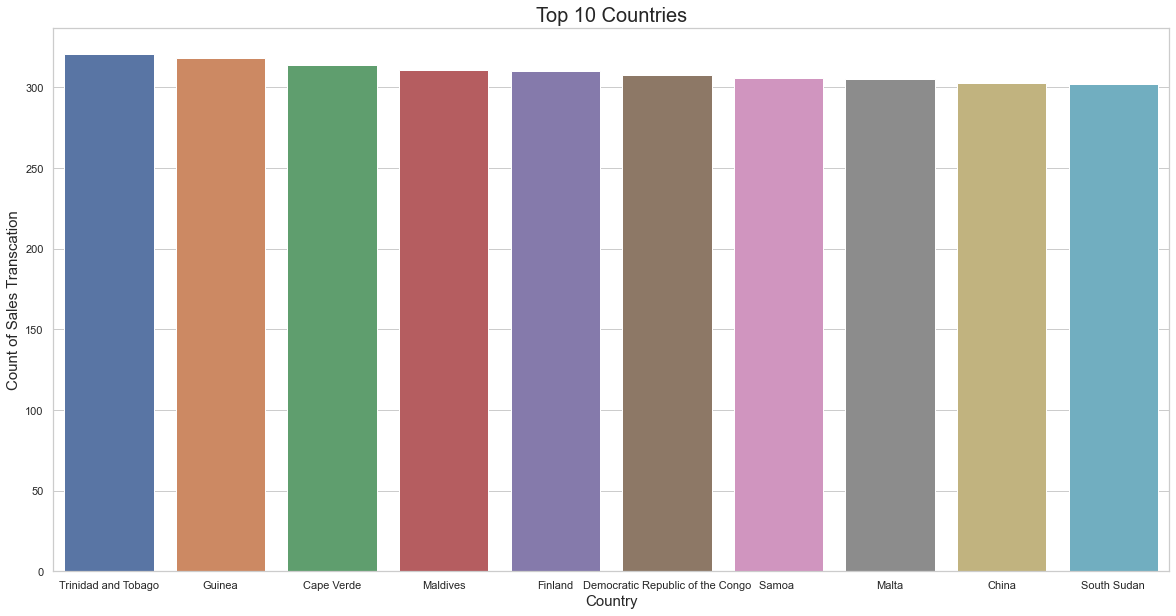

In [578]:
# finding the top 10 countries with the most number of transcations
Top10 = (MMClean['Country'].groupby(MMClean['Country']).count().nlargest(10))
print(Top10)

# making a bar chart 
plt.figure(figsize=(20,10))
sns.barplot(Top10.index, Top10.values)
plt.title('Top 10 Countries', fontsize = 20)
plt.xlabel('Country', fontsize=15)
plt.ylabel('Count of Sales Transcation', fontsize = 15)
plt.show()

### 1 (b)

In [548]:
# creating a new text file with our findings 
# appended the reasons to build a new shipping center in Cape Verde
with open('MarvelMart/MM_Rankings.txt','w+') as rankings: 
    rankings.writelines('Countries Most Sales Transcations: \n')

    for x,y in Top10.items():
        rankings.writelines(f'{x}: {y}\n') 

with open('MarvelMart/MM_Rankings.txt','a') as rankings:
    rankings.write(
'''The country we should build our shipping center in is Cape Verde 
because we found that Cape Verde has the largest number of sales transcations, at 314 
sales transactions and it ranked third overall based on the number of sales transactions
out of all the countries and it has the highest number of sales transactions in countries 
that does not have any shipping center. As such, we should build one there
as soon as possible. \n''' )




## 2. Count of Sales Channels & Order Priorities

### 2 (a)

In [549]:
# findng the count for how many online and office orders we take 
OnOff = (MMClean['Sales Channel'].groupby(MMClean['Sales Channel']).count())
print(OnOff)

Sales Channel
Offline    19788
Online     30183
Name: Sales Channel, dtype: int64


### 2 (b)

In [550]:
# find the count of the different Order Priority Types:
PrioType = (MMClean['Order Priority'].groupby(MMClean['Order Priority']).count())
print(PrioType)

Order Priority
C     5012
H    15094
L     9984
M    19881
Name: Order Priority, dtype: int64


### 2 (c)

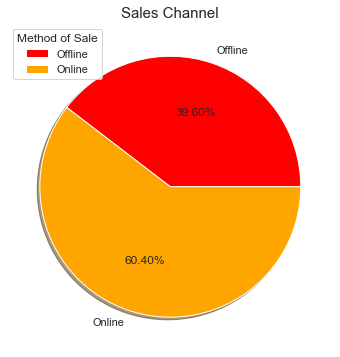

In [579]:
# Create a pie chart for Sales Channel Types:
colors = ['red', 'orange']
plt.figure(figsize=(6,6))
plt.pie(OnOff, labels= OnOff.index,shadow=True,colors = colors,autopct='%.2f%%')
plt.title('Sales Channel', fontsize = 15)
plt.legend(loc=2, title = 'Method of Sale')
plt.show()

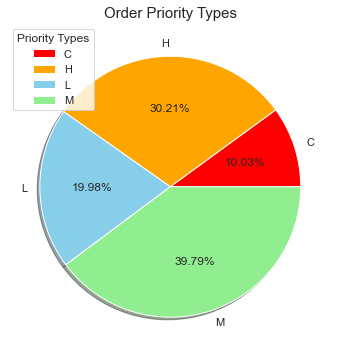

In [581]:
# Create a pie chart for Order Priority
colors = ['red', 'orange', '#87ceeb', '#90EE90']
plt.figure(figsize=(6,6))
plt.pie(PrioType, labels = PrioType.index, shadow =True, colors=colors, autopct = '%.2f%%')
plt.title('Order Priority Types', fontsize = 15)
plt.legend(loc =2, title = 'Priority Types')
plt.show()

### 2 (d)

In [553]:
with open('MarvelMart/MM_Rankings.txt','a') as rankings:
    
    def lineWriter(n,line,v):
        n.writelines(line+'\n')
        for x,y in v.items():
            n.writelines(f'{x}: {y}\n')
            
    lineWriter(rankings,'\nSales Channels:',OnOff.nlargest(2))
    rankings.writelines('We do more online sales.\n')

    lineWriter(rankings,'\nOrder Priorities:', PrioType)
    rankings.writelines('We do more M order priorities.\n')
                       
  

## 3. Profits by Item Type

### 3 (a)

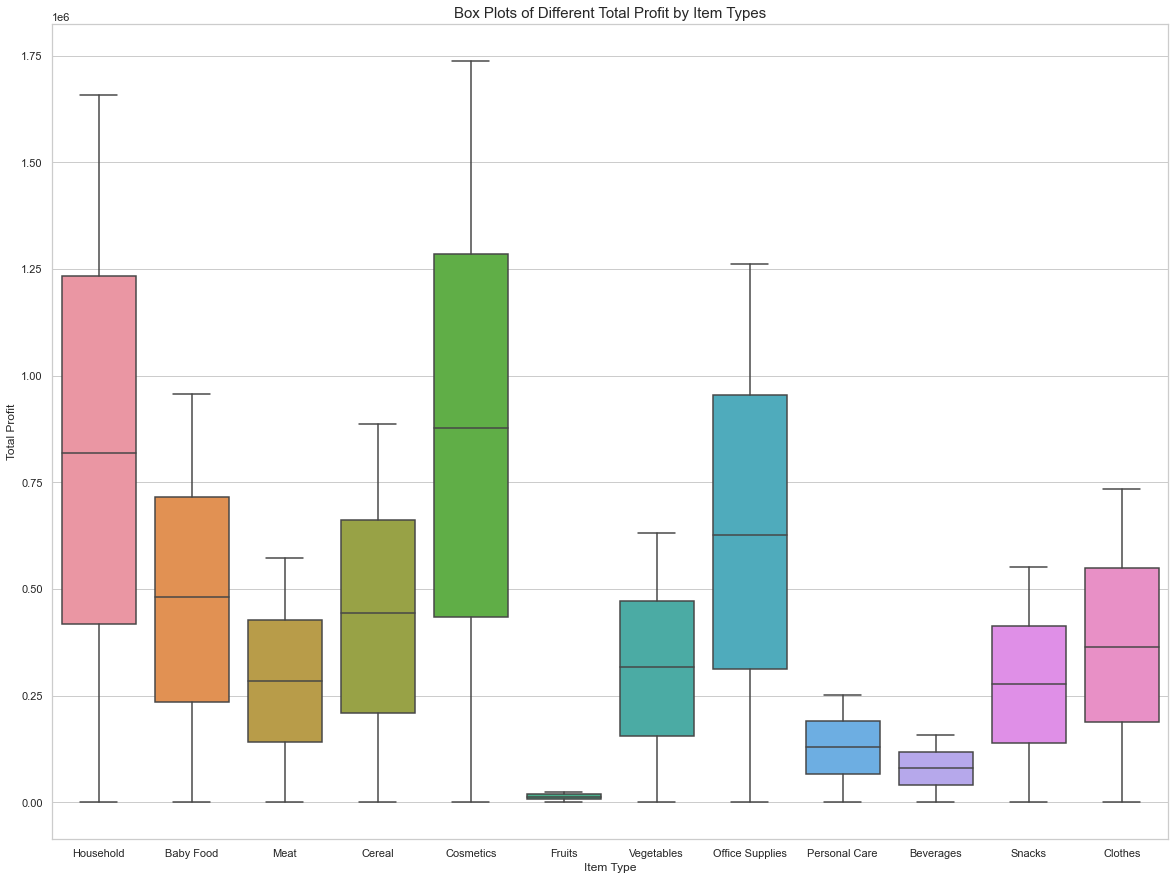

In [583]:
plt.figure(figsize=(20,15))
plt.title('Box Plots of Different Total Profit by Item Types', fontsize = 15)
boxPlot = sns.boxplot(MMClean['Item Type'],MMClean['Total Profit'] )

### 3 (b)

In [555]:
# Summing the profits by each item type 
summation = MMClean['Total Profit'].groupby(MMClean['Item Type']).sum()
print(summation)

Item Type
Baby Food         1942865748.120
Beverages          327559249.080
Cereal            1824726412.290
Clothes           1520832019.680
Cosmetics         3638407966.750
Fruits              51010570.920
Household         3401180998.060
Meat              1196342404.400
Office Supplies   2605440187.500
Personal Care      535250525.600
Snacks            1149715758.720
Vegetables        1322639660.240
Name: Total Profit, dtype: float64


### 3 (c)

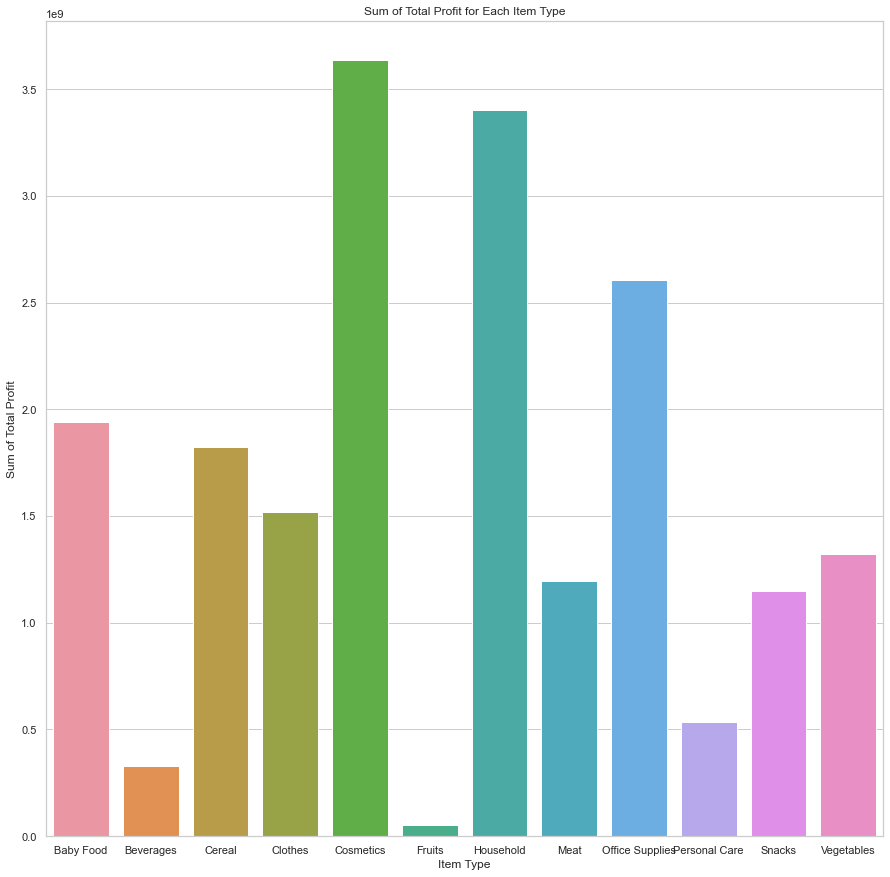

In [556]:
# Create a bar plot for the total profits for each item type
plt.figure(figsize=(15,15))
sns.barplot(summation.index, summation.values)
plt.title('Sum of Total Profit for Each Item Type')
plt.ylabel('Sum of Total Profit')
plt.show()

### 3 (d)

In [557]:
# finding top 3 item types based on 
Top3 = summation.nlargest(3)
print(Top3)

Item Type
Cosmetics         3638407966.750
Household         3401180998.060
Office Supplies   2605440187.500
Name: Total Profit, dtype: float64


### 3 (e)

In [558]:
with open('MarvelMart/MM_Rankings.txt','a') as rankings:
    
    lineWriter(rankings, '\nHighest Selling Items:',Top3)
    rankings.writelines(f'We profited from Cosmetics the most')

### 3 (f)

Based on the box plot from question 3.1, we see that Cosmetics has the highest range, as well as the highest maximum. They also have the highest median, this generally means that cosmetics generally has the most total profit compared to other item types. Moreover, looking at the spread of each item type, we see that cosmetics still has the highest dispersion meaning that the total profit of the cosmetics item type is more spread out in terms of total profit. We also see that Household and Office Supplies seems to have quite a large median compared to other data types. From this, we see that generally, Cosmetics, Household and Office Supplies makes us comparatively higher total profit. We need to dig deeper into these categories to see what kind of prodit margins, number of sales, marketing stretegies are used for these item types and try to apply them to other catergories such as Beverages, Personal Care which seems to be generally making less comparative total profit. Looking at the box plot, Fruits also has the smallest spread, and median, this means that generally, the total profits are smaller values and are within that small range. It was very suprising how much less profit fruits is making in general, compared to other item types. We need to immedately look into that product type. We need to understand why is it making us such little profit compared to other item types. We need to know if it is because of high cost of goods or if the demand is for this product is low. We should consider either revamping fruits to make it more appealing or we should look for new suppliers so that the input cost will be lower, increasing our total profit. If fruits starts to have no profit, or lose money, we should consider removing it from our product line. 

## 4. Descriptive Statistics

### 4 (a)

In [538]:
# making a function to 
dictionary = {}
def seriesMaker(data, dictionary):
    dictionary = {}
    for x, y in data.items():
        if x == 'Units Sold':
            dictionary[x]= y
        if x == 'Unit Cost':
            dictionary[x]= y
        if x == 'Total Revenue':
            dictionary[x] = y
        if x == 'Total Cost':
            dictionary[x] = y
        if x == 'Total Profit':
            dictionary[x] = y
        dictionary = pd.Series(dictionary)
    return dictionary


In [539]:
# Calculating Sums 
MMCleanSum = MMClean.sum(axis=0)
sums = seriesMaker(MMCleanSum,dictionary)
print(sums)

Units Sold        249818150.000
Unit Cost           9360768.320
Total Revenue   66145004417.170
Total Cost      46629032915.810
Total Profit    19515971501.360
dtype: float64


### 4 (b)

In [561]:
# Calculating Averages 
MMCleanAverage = MMClean.mean(axis=0)
means = seriesMaker(MMCleanAverage,dictionary)
print(means)

Units Sold         4999.263
Unit Cost           187.324
Total Revenue   1323667.816
Total Cost       933121.869
Total Profit     390545.947
dtype: float64


### 4 (c)

In [562]:
# Calculating Maximums
MMCleanMax = MMClean.max(axis=0)
maxes = seriesMaker(MMCleanMax, dictionary)
print(maxes)

Units Sold        10000.000
Unit Cost           524.960
Total Revenue   6682031.730
Total Cost      5249075.040
Total Profit    1738178.390
dtype: float64


### 4 (d)

In [563]:
#dropping Units Sold and Unit Cost from sums, means, and maxs
def dropper(x):
    return x.drop(['Units Sold', 'Unit Cost'])

Nmeans = dropper(means)
Nsums = dropper(sums)
Nmaxes = dropper(maxes)

print(Nsums)
print()
print(Nmaxes)
print()
print(Nmeans)


Total Revenue   66145004417.170
Total Cost      46629032915.810
Total Profit    19515971501.360
dtype: float64

Total Revenue   6682031.730
Total Cost      5249075.040
Total Profit    1738178.390
dtype: float64

Total Revenue   1323667.816
Total Cost       933121.869
Total Profit     390545.947
dtype: float64


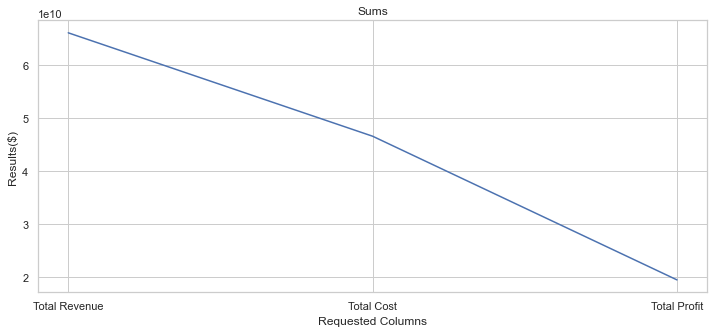

In [603]:
plt.figure(figsize=(12,5))
plt.title('Sums')
plt.xlabel('Requested Columns')
plt.ylabel('Results($)')
linewidth =20000
# making line graph for sums 
sns.lineplot(Nsums.index, Nsums.values)
plt.show()

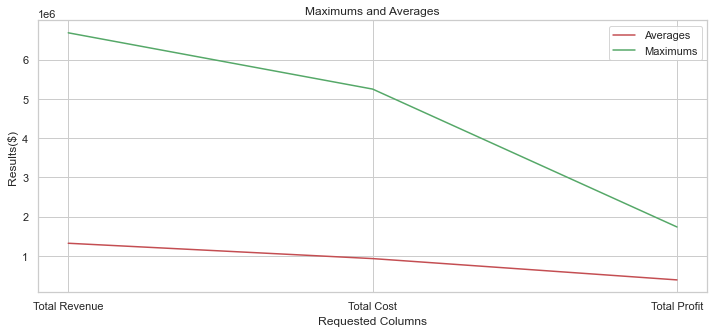

In [604]:
# making a line graph for means and max 
plt.figure(figsize=(12,5))
plt.plot(Nmeans.index, Nmeans.values, label = 'Averages',color = 'r')
plt.plot(Nmaxes.index, Nmaxes.values, label = 'Maximums', color = 'g')
plt.title('Maximums and Averages')
plt.xlabel('Requested Columns')
plt.ylabel('Results($)')
plt.legend()
plt.show()

4 (e)

In [566]:
with open('MarvelMart/MM_Calc.txt','w+') as Calc:
    lineWriter(Calc,'Sums:',sums)
    lineWriter(Calc,'\nAverages:', means)
    lineWriter(Calc,'\nMaximums:', maxes)

    

## Part 3: Cross-Reference Statistics

### 1. Making a list of regions and the countries with in them

In [567]:
# getting a list of regions and countries in the region (no duplicate)
regions = MMClean['Country'].groupby(MMClean['Region']).unique()

# converting series into a dictionary 
dictionaryRegions = regions.to_dict()

# converting a dictionary into a dataframe
df = pd.DataFrame.from_dict(dictionaryRegions,orient='index').transpose()
df

,Asia,Australia and Oceania,Central America and the Caribbean,Europe,Middle East and North Africa,North America,Sub-Saharan Africa
0,Indonesia,Tuvalu,Antigua and Barbuda,Iceland,Turkey,Greenland,Namibia
1,India,Samoa,Saint Kitts and Nevis,Russia,Iraq,United States of America,Djibouti
2,South Korea,Fiji,Saint Lucia,Moldova,Kuwait,Canada,Cameroon
3,Kazakhstan,Marshall Islands,Trinidad and Tobago,Malta,Tunisia,Mexico,Nigeria
4,Mongolia,New Zealand,Guatemala,Greece,Yemen,None,Senegal
5,Malaysia,Solomon Islands,Saint Vincent and the Grenadines,Ukraine,United Arab Emirates,None,Rwanda
6,Singapore,Vanuatu,Jamaica,Finland,Bahrain,None,South Sudan
7,Brunei,Australia,Grenada,United Kingdom,Pakistan,None,Guinea
8,Kyrgyzstan,Papua New Guinea,Honduras,San Marino,Lebanon,None,Botswana
9,Taiwan,Nauru,Belize,Kosovo,Somalia,None,Sudan


### Part 2: Write a csv file 

In [568]:
# saving the dataframe as a CSV file 'Countries_By_Regions'
df.to_csv('MarvelMart/Countries_By_Region.csv', index=False)